## step1

OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다.
<br/>
여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 
detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다.
<br/>
이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

각 항목당 이미지 최대 장수 = 20

### 즉 데이터를 위 항목에 맞게 augmentation 하라는 뜻이구만?

## step3

모듈들마다 출력 형태가 다릅니다.
<br/>
분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다.
<br/>
시각화 방법이 함께 활용된다면 더욱 좋겠군요.

### 각 ocr 모델이 추출한 문자의 개수를 카운트해서 어느 모델이 가장 많은 단어를 뽑아냈는지 확인하자

## step4

우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
<br/>
여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다.
<br/>
그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

### 내가 구현하고자 하는 서비스의 목적과 내용

일단 ocr 자체는 상당히 라이브러리화가 잘 되어있다
<br/>
즉 누구나 쓸 수 있다
<br/>
때문에 OCR을 이용한 무언가를 만들어야만 경쟁력이 생긴다

<br/>

사진에 있는 문자를 인식해서 컴퓨터가 인식하기 쉬운 문자열 데이터로 반환해주는 기능
<br/>

### 문자 사진이 존재하는 곳은 어디?

캘리그라피
<br/>
: 글씨를 마치 그림 그리듯이 쓰는 컨텐츠
<br/>
서예
<br/>

### 역추적

해외로 여행을 가서 모르는 단어를 파파고 OCR로 인식해서 해석할 때는 굉장히 유용합니다
<br/>
즉 모르는 단어가 구글이나 번역기 등에 연동할 수 있는 형태가 아닐 때,
<br/>
OCR은 굉장히 효율적인 기능이 됩니다
<br/>
그럼 모르는 단어가 많은 상황은 어떤 상황인가?

<br/>

사실 이건 굉장히 주관적이다
<br/>
수학 기호를 모를 수도 있고, 음악 기호를 모를 수도 있고, 불어를 모를 수도 있는 등
<br/>

### 그럼 어떻게 극복할 수 있는가?

최대한 많은 기호, 단어, 언어를 인식한 모델을 쓰는 게 베스트다
<br/>
하지만 이는 이미 파파고의 언어감지라는 이름으로 존재한다

<br/>

### 그럼 경쟁력을 가지려면 어떻게 해야될까?

앞에서 수학 기호나 음악 기호를 말했다
<br/>
삼성은 손글씨 수학, 음악 기호를 인식해서 문자열로 기입해주는 기능이 있다
<br/>
심지어 이모티콘도 가능한 걸로 알고 있다

<br/>

어? 그럼 수학이나 음악 기호를 인식하는 모델을 만드는 것도 의미 없겠네?
<br/>
사실 그렇긴 하다
<br/>
그럼 어떻게 경쟁력을 가질 것인가

<br/>

나는 나만의 기호를 모델이 이미지에서 OCR해주는 기능이 필요하다 생각한다

<br/>

### 어떻게 나만의 기호를 모델이 OCR해주는 기능을 만들 것인가

augmentation을 하면 된다
<br/>
아무리 augmentation을 한다 하더라도 데이터를 불리는데 한계가 있을 거라 생각할 수 있다
<br/>
하지만 그 데이터를 3D 렌더링 이미지로 채운다고 하면 가능하다
<br/>

3D는 애초에 진짜같은 가상현실을 만들기 위해 탄생한 Tool이다
<br/>
잘만 사용한다면 현실과 다를바 없는 이미지를 만들 수 있다

<br/>

사실같은 이미지가 문제가 아니라, 기호를 그릴 때마다 랜덤한 형태가 되기 때문에 불가능할 거 같다
<br/>
하지만 이또한 기호를 vector로 그리면 된다
<br/>
vector로 그린다?
<br/>
clip studio라는 프로그램이 있다
<br/>
이 프로그램은 사용자가 마우스 드래그로 움직인 경로를 vector로 만든다
<br/>
그려진 vector에는 모양을 바꿀 수 있는 컨트롤러가 있다
<br/>
이 컨트롤러를 랜덤하게 움직여서 augmentation이 가능하다

<br/>

### 창작 기호

기존의 OCR이 랜덤하게 그려진 기호를 하나의 레이블로 인식하는 기능이었다면,
<br/>
저는 사용자가 기호를 만들면 그 기호의 랜덤한 deform 형태를 예측해서 학습하여 사용자가 편하게 쓸 수 있도록 하고자 하는 겁니다

<br/>

### 이게 왜 필요한가

마우스 드래그의 형태를 전 제스쳐라 합니다
<br/>
저는 이 제스쳐가 지원되는 웨일에서 활발히 사용하고 있습니다
<br/>
아마 제가 애플의 맥북을 쓰게 된다면, 맥북 제스쳐를 굉장히 잘 쓸 거 같습니다
<br/>
그런데 이게 생각보다 제한되어있습니다
<br/>
대부분 라이브러리에서 이미 만들어진 제스쳐를 가져와 원하는 작업을 할당하는 방식입니다

만약 다른 플랫폼에서 내가 편하게 쓰던 제스쳐가 현재 플랫폼에 없다면?
<br/>
적응 기간이 길어지고 플랫폼을 바꿀 필요가 없다면 굳이 바꾸려 하지도 않겠죠
<br/>

### 최종 목표

저는 데이터 기반 인공지능에 한계가 다가왔다고 생각합니다
<br/>
때문에 그걸 넘으려면, 데이터 deform 경우의 수를 전부 가상으로 만들어서
<br/>
사람이 deform한 경우의 수가 가상으로 만든 deform에 포함되게 해야만 한다고 생각했습니다
<br/>
애초에 학습 데이터 양이 많다고 인공지능 모델 용량 자체가 늘지는 않으니깐요

<br/>

소신 발언을 하자면
<br/>
저는 인공지능 특히 딥러닝이 빅데이터를 압축하는 하나의 방법이라고 생각합니다


In [1]:
import keras_ocr
print(keras_ocr.__version__)


import matplotlib.pyplot as plt
pipeline = keras_ocr.pipeline.Pipeline()

0.8.8
Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


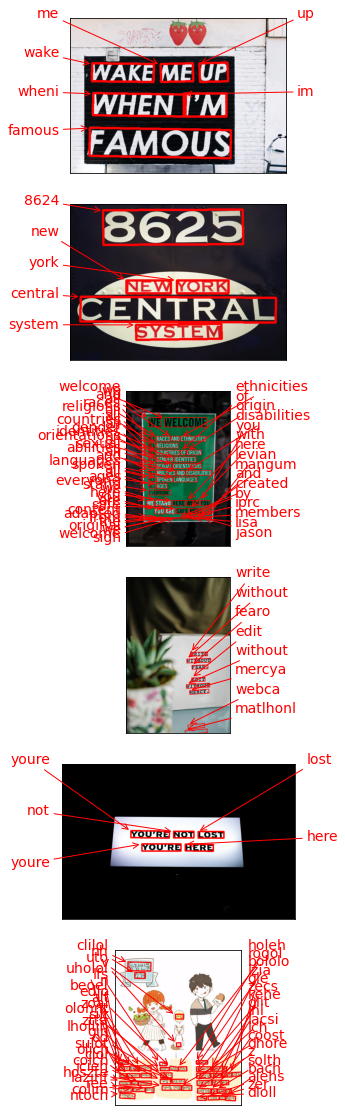

In [2]:
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4',
  'https://mblogthumb-phinf.pstatic.net/20150427_155/tjdpdls77_1430121587117Ke4Mz_PNG/1245_572_22.png?type=w2',
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]


# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [22]:
# 감지한 단어 갯수

sen_k = []

for i in range(len(prediction_groups)):
    for j in range(len(prediction_groups[i])):
        sen_k.append(len(prediction_groups[i][j]))
        print(len(prediction_groups[i][j]))

print('총 개수', sum(sen_k))


6
5
54
8
5
46
총 개수 124


In [23]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.3.8


In [34]:
import requests
from io import BytesIO

response = requests.get('https://source.unsplash.com/M7mu6jXlcns/640x460')

image = Image.open(BytesIO(response.content))

In [90]:
def crop_word_regions(image_path=image_urls, output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    index = 0
    cropped_image_path_list = []
    for i in image_path:
        image = requests.get(i)
        image = Image.open(BytesIO(image.content))

        recognized_data = pytesseract.image_to_data(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
    
        top_level = max(recognized_data['level'])
        
        for i in range(len(recognized_data['level'])):
            level = recognized_data['level'][i]
    
            if level == top_level:
                left = recognized_data['left'][i]
                top = recognized_data['top'][i]
                width = recognized_data['width'][i]
                height = recognized_data['height'][i]
            
                output_img_path = os.path.join(output_path, f"{str(index).zfill(5)}.png")
                print(output_img_path)
                cropped_image = image.crop((
                    left,
                    top,
                    left+width,
                    top+height
                ))
                cropped_image.save(output_img_path)
                cropped_image_path_list.append(output_img_path)
                index += 1
        index +=1000
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ex_/15/work_dir'

cropped_image_path_list = crop_word_regions(image_urls, work_dir)


/aiffel/aiffel/ex_/15/work_dir/00000.png
/aiffel/aiffel/ex_/15/work_dir/01001.png
/aiffel/aiffel/ex_/15/work_dir/01002.png
/aiffel/aiffel/ex_/15/work_dir/01003.png
/aiffel/aiffel/ex_/15/work_dir/01004.png
/aiffel/aiffel/ex_/15/work_dir/01005.png
/aiffel/aiffel/ex_/15/work_dir/01006.png
/aiffel/aiffel/ex_/15/work_dir/01007.png
/aiffel/aiffel/ex_/15/work_dir/01008.png
/aiffel/aiffel/ex_/15/work_dir/01009.png
/aiffel/aiffel/ex_/15/work_dir/02010.png
/aiffel/aiffel/ex_/15/work_dir/02011.png
/aiffel/aiffel/ex_/15/work_dir/02012.png
/aiffel/aiffel/ex_/15/work_dir/02013.png
/aiffel/aiffel/ex_/15/work_dir/02014.png
/aiffel/aiffel/ex_/15/work_dir/02015.png
/aiffel/aiffel/ex_/15/work_dir/02016.png
/aiffel/aiffel/ex_/15/work_dir/02017.png
/aiffel/aiffel/ex_/15/work_dir/02018.png
/aiffel/aiffel/ex_/15/work_dir/02019.png
/aiffel/aiffel/ex_/15/work_dir/02020.png
/aiffel/aiffel/ex_/15/work_dir/02021.png
/aiffel/aiffel/ex_/15/work_dir/02022.png
/aiffel/aiffel/ex_/15/work_dir/02023.png
/aiffel/aiffel/e

In [91]:
len(cropped_image_path_list)

94

In [102]:
recognized_data_text = []

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'

    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        recognized_data_text.append(recognized_data['text'][:-2])
        
    print("Done")
    return(recognized_data_text)

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

Done


['',
 'Sic pPbo.',
 '>',
 'eo a a',
 'ae',
 '=',
 'CENTRAL',
 '~we',
 'mh SYSTEM',
 'eee',
 'nde aes',
 'wa',
 ')',
 'Genie',
 'it',
 '|3',
 'RELIGIONS',
 'Oa aati',
 ')F',
 'ORIGIN',
 'GENDER IDENTITIES',
 'SEXUAL',
 'ORIENTATIONS',
 'Nees',
 'AND',
 'DISABILITIES',
 'SPOKEN',
 '| ANGUAGES',
 'AGES',
 'WE',
 'STAND',
 'aut',
 'ARE',
 '',
 'WRITE',
 'WITHOUT',
 'FEAR.',
 'EDIT',
 'WITHOUT',
 'MERCY.',
 '——ea',
 '',
 "YOU'RE",
 'NOT',
 'LOST',
 "YOU'RE",
 'reer Ee.',
 "| “you're Here",
 '',
 '4',
 '|',
 'UE OIo\\',
 'Ral.',
 'ete',
 '+Sr2',
 'Lb?',
 'Horr',
 'qe',
 'OFp |',
 'SIN',
 'Ror',
 'AS',
 'NHR.',
 'TK2bEH',
 'Tol',
 'Boer}',
 '“yk',
 '',
 'st',
 'i',
 'LPARRID.',
 'Soi (2)',
 'Hels',
 'Hels',
 'tee',
 'Eolas',
 'MBSA ry',
 'o\\TH',
 'BH pol 2h',
 'LARA.',
 'tsk',
 'CLA.',
 'AS',
 'Cia +',
 'LISAN TL',
 'om)',
 'bch.',
 'DHSS',
 'ry',
 'Soteth',
 'Olo',
 '"Sen" 2kp Fer}',
 '2H',
 'Hert}']

In [115]:
len(recognized_data_text)

94

1


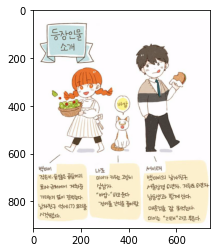

1


In [88]:
print('1')

plt.imshow(image)
plt.show(image)

print('1')

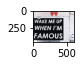

인식 단어 


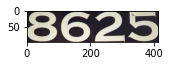

인식 단어 Sic pPbo.


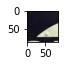

인식 단어 >


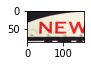

인식 단어 eo a a


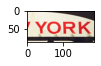

인식 단어 ae


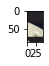

인식 단어 =


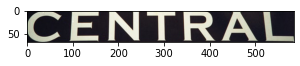

인식 단어 CENTRAL


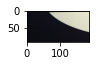

인식 단어 ~we


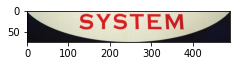

인식 단어 mh SYSTEM


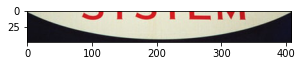

인식 단어 eee


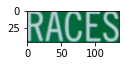

인식 단어 nde aes


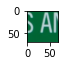

인식 단어 wa


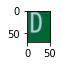

인식 단어 )


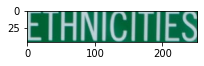

인식 단어 Genie


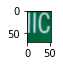

인식 단어 it


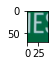

인식 단어 |3


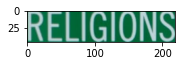

인식 단어 RELIGIONS


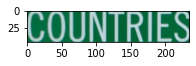

인식 단어 Oa aati


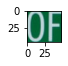

인식 단어 )F


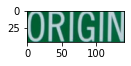

인식 단어 ORIGIN


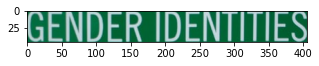

인식 단어 GENDER IDENTITIES


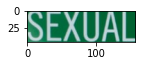

인식 단어 SEXUAL


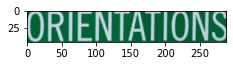

인식 단어 ORIENTATIONS


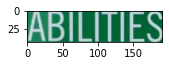

인식 단어 Nees


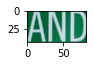

인식 단어 AND


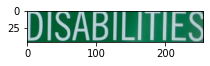

인식 단어 DISABILITIES


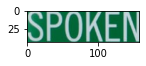

인식 단어 SPOKEN


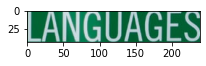

인식 단어 | ANGUAGES


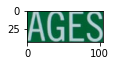

인식 단어 AGES


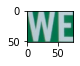

인식 단어 WE


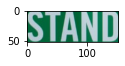

인식 단어 STAND


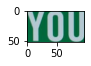

인식 단어 aut


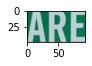

인식 단어 ARE


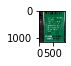

인식 단어 


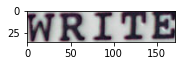

인식 단어 WRITE


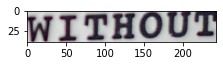

인식 단어 WITHOUT


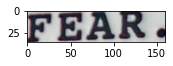

인식 단어 FEAR.


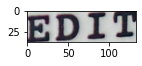

인식 단어 EDIT


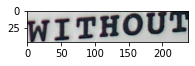

인식 단어 WITHOUT


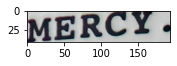

인식 단어 MERCY.


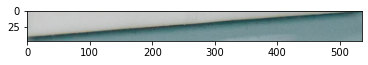

인식 단어 ——ea


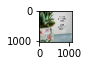

인식 단어 


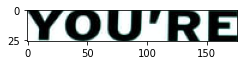

인식 단어 YOU'RE


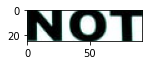

인식 단어 NOT


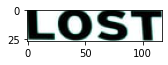

인식 단어 LOST


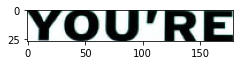

인식 단어 YOU'RE


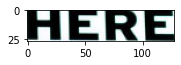

인식 단어 reer Ee.


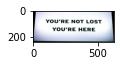

인식 단어 | “you're Here


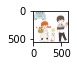

인식 단어 


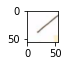

인식 단어 4


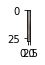

인식 단어 |


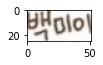

인식 단어 UE OIo\


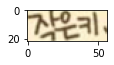

인식 단어 Ral.


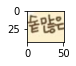

인식 단어 ete


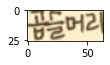

인식 단어 +Sr2


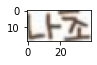

인식 단어 Lb?


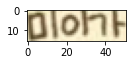

인식 단어 Horr


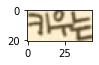

인식 단어 qe


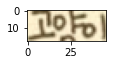

인식 단어 OFp |


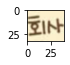

인식 단어 SIN


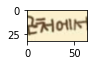

인식 단어 Ror


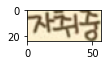

인식 단어 AS


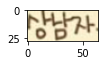

인식 단어 NHR.


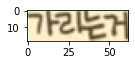

인식 단어 TK2bEH


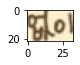

인식 단어 Tol


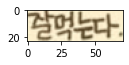

인식 단어 Boer}


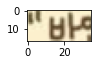

인식 단어 “yk


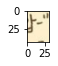

인식 단어 


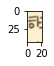

인식 단어 st


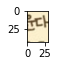

인식 단어 i


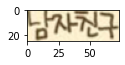

인식 단어 LPARRID.


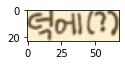

인식 단어 Soi (2)


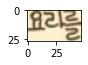

인식 단어 Hels


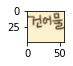

인식 단어 Hels


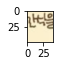

인식 단어 tee


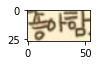

인식 단어 Eolas


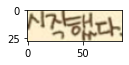

인식 단어 MBSA ry


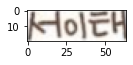

인식 단어 o\TH


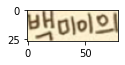

인식 단어 BH pol 2h


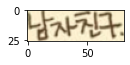

인식 단어 LARA.


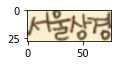

인식 단어 tsk


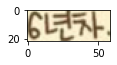

인식 단어 CLA.


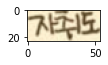

인식 단어 AS


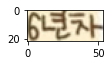

인식 단어 Cia +


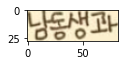

인식 단어 LISAN TL


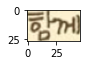

인식 단어 om)


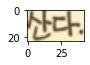

인식 단어 bch.


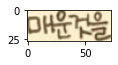

인식 단어 DHSS


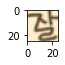

인식 단어 ry


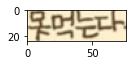

인식 단어 Soteth


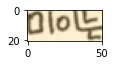

인식 단어 Olo


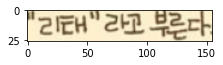

인식 단어 "Sen" 2kp Fer}


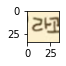

인식 단어 2H


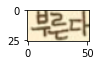

인식 단어 Hert}


In [118]:
t_c = 0

for i in cropped_image_path_list:
    plt.subplot(len(images),1,1)
    image = Image.open(i)
    plt.imshow(image)
    plt.show()
    
    print('인식 단어:',recognized_data_text[t_c])
    t_c += 1

# 회고

확인 결과
<br/>
keras OCR은 영어를 굉장히 잘 감지합니다
<br/>
pytesseract는 글자 감지가 뒤떨어지지만, 기호까지 감지할 수 있었습니다
<br/>
또 언어 설정까지 해줄 수 있다는게 큰 장점인 거 같습니다
<br/>

### 예상되는 문제점

일단 tesseract가 crop한 이미지를 봤는데, 생각보다 문제가 심각했습니다
<br/>
기호를 감지한 거 까지는 좋은데, 문제는 글자를 기호로 인식했다는 점에서 실망했고,
<br/>
segmentation도 제대로 되지 않았습니다
<br/>
제가 가장 놀란 점은 바로 segmentation이 제대로 되지 않았다는 점입니다
<br/>
근데 생각해보면 그럴만 한게, 위에서 말했다시피 글자는 deform 형태가 너무 많습니다
<br/>
segmentation이 제대로 될 수 없는 이유중 하나겠죠

### 모델 평가 가설

모델을 평가할 때 데이터셋을 합성해서 여러 상황을 만들고자 합니다
<br/>
1. 글자 일부를 가리기
<br/>
2. blur를 넣어서 글자를 흐리게 만들기
<br/>
3. 글자를 꾸기기
<br/>
4. 글자 색을 여러 가지로 바꾸기
<br/>
5. 글자 회전시키기
<br/>
6. 글자와 배경 대비 약하게 만들기
<br/>
7. 글자 크기를 변화시키기

위 상황마다의 모델의 성능을 평가해서 OCR 성능 자체를 체크해보고자 합니다



### 모델 평가

keras의 경우 한글 dataset을 학습시켜서 한글 OCR을 만드는게 가능하다고 본문 링크에 적혀있더군요
<br/>
성공했다는 분의 깃허브에 들어가서 keras.ocr 파일에 어떤 점이 달라졌는지 찾아봤는데, 실패했습니다
<br/>
추후 도움이 되고자 keras ocr 강의 자료만 찾았습니다

https://youtu.be/SHo3hbsJs_U

여튼 keras 모델은 글자 인식이 탁월하지만, 한글로 바꾸기가 어렵습니다
<br/>
반대로, tesseract는 한글로 바꾸기 쉽지만, 성능은 떨어집니다
<br/>